In [ ]:
# This makes a block diagram from information in the FITS headers

In [ ]:
## For a demo of how this notebook works, download the fake FITS files in the directory
## YOURUSERNAME@lbti-cdata:/mnt/iscsi/lmircam/L0/fake_fits
## to the directory /fake_fits/ within the directory this notebook is in.
## Then proceed through the following steps. Edit this notebook as you wish
## once you are ready to run it on your own data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from astropy.io import fits
import pandas as pd
from datetime import datetime
%matplotlib qt

In [2]:
# read in FITS header data to get filter info
full_table = pd.read_csv('fizeau_altair_180507_metadata.csv')

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,80,81,84,88,92,149) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# sort table by frame number (a few are out of order)

full_table.sort_values(["FRAMENUM"], inplace=True)
full_table = full_table.reset_index(drop=True) # reset indices and don't keep the old ones

In [5]:
# print all keys

for i in range(0,200):
    print(full_table.keys()[i])

Unnamed: 0
ACTEXP
AGE_STOP
BADROWS
BAYXCUR
BAYXREQ
BAYYCUR
BAYYREQ
BITPIX
BSCALE
BZERO
COMMENT
CTLRTEMP
DATAFLAG
DATE-OBS
DETECTOR
DETTEMP
DET_OP
DIMMFLUX
EXPMODE
EXPTIME
EXTEND
FILENAME
FLAG
FPCAZM
FPCAZS
FPCELM
FPCELS
FPCPISTM
FPCPISTS
FRAME
FRAMENUM
GAIN
GROUP
IL_HORIZ
INSTRUME
ITIME
KTCREMOV
LBTTEMP
LBT_AIRM
LBT_ALT
LBT_AZ
LBT_DEC
LBT_LST
LBT_LXOS
LBT_LYOS
LBT_PARA
LBT_RA
LBT_RXOS
LBT_RYOS
LBT_UTC
LCMODES
LGAIN
LLOOPON
LMIRFW25
LMIR_FW1
LMIR_FW2
LMIR_FW3
LMIR_FW4
LOFFSETX
LOFFSETY
LOFFSETZ
LSLNULL
LSTATUS
LTTMODUL
LWCCDBIN
LWCCDFRQ
LWIND1S
MAGWHEEL
NAXIS
NAXIS1
NAXIS2
NCBMDVT
NCOADDS
NDROPS
NGROUPS
NIC_NAC
NIL_NDFW
NIL_OPW
NIL_PRW
NLDCRC
NLMGTLT
NLNCNC
NLPPLTLT
NLWNTRNS
NMCLFSS
NMCMSLD
NOCHAVG
NODPOS
NOMICFW1
NOMICFW2
NOMICLAM
NOMIC_PW
NOUTPUTS
NRAMPS
NREADS
NRESETS
OBJNAME
PCB1X
PCB1Y
PCBRAD
PCCLOSED
PCFJMPS
PCJD
PCLAMB1
PCLAMB2
PCLOOPHZ
PCMSNR1
PCMSNR2
PCPHMCS1
PCPHMCS2
PCPHMEN1
PCPHMEN2
PCPHMSN1
PCPHMSN2
PCPHSTD1
PCPHSTD2
PCPLDG
PCPLIG
PCPLPG
PCPLSP01
PCPLSP1
PCSSPER
PCTIPSP
PCT

IndexError: index 171 is out of bounds for axis 0 with size 171

### Make lists of filenames partitioned by PA

In [62]:
# read in text file containing file names of good A and D frames
good_files_A = pd.read_csv("data/good_frames_list_A_frames.txt", names=["filename"])
good_files_D = pd.read_csv("data/good_frames_list_D_frames.txt", names=["filename"])

# pin a PA to each frame
good_files_A["PA"] = np.nan
good_files_D["PA"] = np.nan
good_files_A["framenum"] = np.nan
good_files_D["framenum"] = np.nan
for m in range(0,len(good_files_A["PA"])):
    pa_val = full_table["LBT_PARA"].where(full_table["FILENAME"] == good_files_A["filename"].iloc[m]).dropna().values[0]
    good_files_A["PA"].iloc[m] = pa_val
    frame_num = full_table["FRAMENUM"].where(full_table["FILENAME"] == good_files_A["filename"].iloc[m]).dropna().values[0]
    good_files_A["framenum"].iloc[m] = frame_num
    #print("m: "+str(m)+" pa="+str(pa_val))
for n in range(0,len(good_files_D["PA"])):
    pa_val = full_table["LBT_PARA"].where(full_table["FILENAME"] == good_files_D["filename"].iloc[n]).dropna().values[0]
    good_files_D["PA"].iloc[n] = pa_val
    frame_num = full_table["FRAMENUM"].where(full_table["FILENAME"] == good_files_D["filename"].iloc[n]).dropna().values[0]
    good_files_D["framenum"].iloc[n] = frame_num
    #print("n: "+str(n)+" pa="+str(pa_val))

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


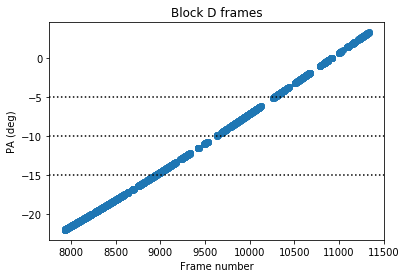

In [80]:
# see what number of frames are in sections of 5 degrees 

# save text files of file names; these are the files which will need to be present in the input directory

plt.clf()
plt.scatter(good_files_A['framenum'],good_files_A['PA'])
plt.xlabel("Frame number")
plt.ylabel("PA (deg)")
plt.title("Block A frames")
plt.savefig("junk1.pdf")

plt.clf()
plt.scatter(good_files_D['framenum'],good_files_D['PA'])
plt.xlabel("Frame number")
plt.ylabel("PA (deg)")
plt.axhline(y=-15, linestyle=":", color="k")
plt.axhline(y=-10, linestyle=":", color="k")
plt.axhline(y=-5, linestyle=":", color="k")
plt.title("Block D frames")
plt.savefig("junk2.pdf")

In [72]:
# loop through all the frames and flag them as to what strip the

-43.343373
-36.018198999999996
7.325174000000004
-39.6757894050926


In [49]:
idx = 6298
print(full_table["FILENAME"].iloc[idx])
print(full_table["LBT_PARA"].iloc[idx])

lm_180507_006298.fits
-36.030719


In [39]:
full_table["FILENAME"].dropna().values[0]

'lm_180507_000000.fits'

In [36]:
full_table["FILENAME"][0]

0        lm_180507_000000.fits
1        lm_180507_000001.fits
2        lm_180507_000002.fits
3        lm_180507_000003.fits
4        lm_180507_000004.fits
                 ...          
12002    lm_180507_012003.fits
12003    lm_180507_012004.fits
12004    lm_180507_012005.fits
12005    lm_180507_012006.fits
12006    lm_180507_012007.fits
Name: FILENAME, Length: 12007, dtype: object

In [8]:
# print stuff to screen

for t in range(7355,7654):
    print('FRAMENUM: '+str(full_table['FRAMENUM'][t])+
          #'| FW1: '+str(full_table['LMIR_FW1'][t])+
          #'| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| ACTEXP: '+str(full_table['ACTEXP'][t])+
          #'| FW3: '+str(full_table['LMIR_FW3'][t])+
          '| LBT_UTC: '+str(full_table['LBT_UTC'][t])+
          #'| PA: '+str(full_table['LBT_PARA'][t]))
          '| PCCLOSED: '+str(full_table['PCCLOSED'][t]))

FRAMENUM: 7356| ACTEXP: 145976| LBT_UTC: 11:01:44.377| PCCLOSED: -99999
FRAMENUM: 7357| ACTEXP: 145976| LBT_UTC: 11:01:45.781| PCCLOSED: 1
FRAMENUM: 7358| ACTEXP: 145976| LBT_UTC: 11:01:47.035| PCCLOSED: 1
FRAMENUM: 7359| ACTEXP: 145976| LBT_UTC: 11:01:47.035| PCCLOSED: 1
FRAMENUM: 7360| ACTEXP: 145976| LBT_UTC: 11:01:48.539| PCCLOSED: 1
FRAMENUM: 7361| ACTEXP: 145976| LBT_UTC: 11:01:49.693| PCCLOSED: 1
FRAMENUM: 7362| ACTEXP: 145976| LBT_UTC: 11:01:49.693| PCCLOSED: 1
FRAMENUM: 7363| ACTEXP: 145976| LBT_UTC: 11:01:50.896| PCCLOSED: 1
FRAMENUM: 7364| ACTEXP: 145976| LBT_UTC: 11:01:52.200| PCCLOSED: 1
FRAMENUM: 7365| ACTEXP: 145976| LBT_UTC: 11:01:53.505| PCCLOSED: 1
FRAMENUM: 7366| ACTEXP: 145976| LBT_UTC: 11:01:53.505| PCCLOSED: 1
FRAMENUM: 7367| ACTEXP: 145976| LBT_UTC: 11:01:54.809| PCCLOSED: 1
FRAMENUM: 7368| ACTEXP: 145976| LBT_UTC: 11:01:56.013| PCCLOSED: 1
FRAMENUM: 7369| ACTEXP: 145976| LBT_UTC: 11:01:57.216| PCCLOSED: 1
FRAMENUM: 7370| ACTEXP: 145976| LBT_UTC: 11:01:57.216| PC

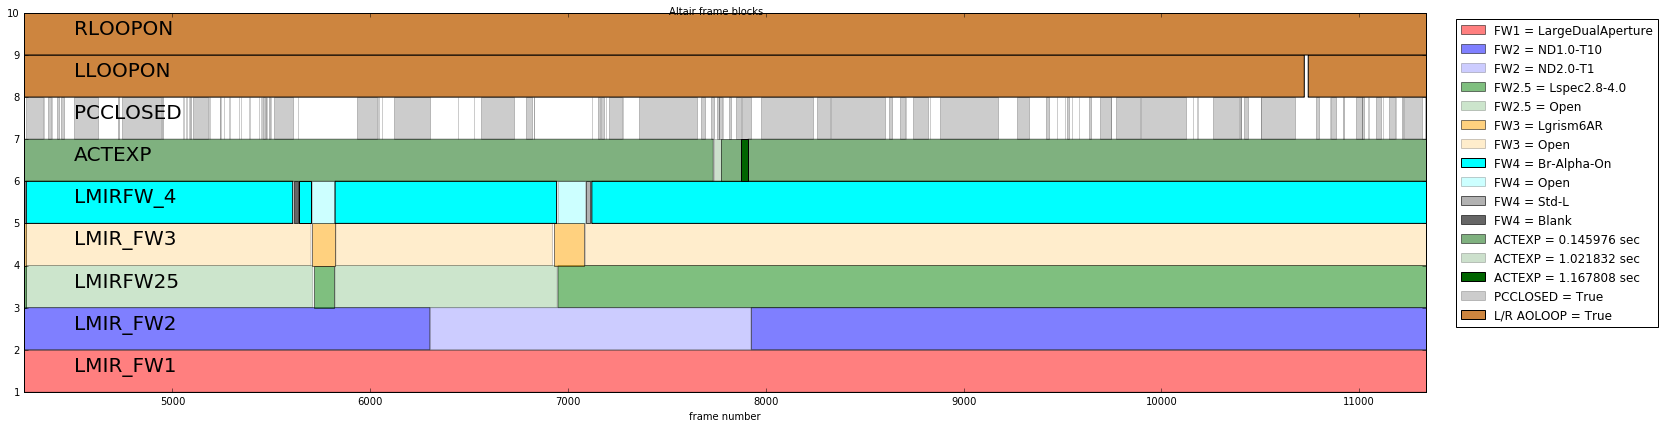

In [77]:
############################################################
# Infomertial: make plot of relevant quantities for classifying the blocks of frames:
# 1. 2 filters
# 2. 3 targets
# 3. 2 nod positions

fig, ax = plt.subplots()
fig.set_size_inches(20,6)


# LMIR FW1
ax.fill_between(full_table["FRAMENUM"], 1, 2, where=full_table["LMIR_FW1"]=="94800", \
                facecolor='red', label='FW1 = LargeDualAperture', alpha=0.5)
ax.annotate('LMIR_FW1', xy=(4500, 1.5), size=20, xycoords='data')


# LMIR FW2
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="ND1.0-T10", \
                facecolor='blue', label='FW2 = ND1.0-T10', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 2, 3, where=full_table["LMIR_FW2"]=="ND2.0-T1", \
                facecolor='blue', label='FW2 = ND2.0-T1', alpha=0.2)
ax.annotate('LMIR_FW2', xy=(4500, 2.5), size=20, xycoords='data')


# LMIR FW2.5
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LMIRFW25"]=="Lspec2.8-4.0", \
                facecolor='green', label='FW2.5 = Lspec2.8-4.0', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 3, 4, where=full_table["LMIRFW25"]=="Open", \
                facecolor='green', label='FW2.5 = Open', alpha=0.2)
ax.annotate('LMIRFW25', xy=(4500, 3.5), size=20, xycoords='data')


# LMIR FW3
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="Lgrism6AR", \
                facecolor='orange', label='FW3 = Lgrism6AR', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 4, 5, where=full_table["LMIR_FW3"]=="Open", \
                facecolor='orange', label='FW3 = Open', alpha=0.2)
ax.annotate('LMIR_FW3', xy=(4500, 4.5), size=20, xycoords='data')


# LMIR FW4
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Br-Alpha-On", \
                facecolor='cyan', label='FW4 = Br-Alpha-On', alpha=1)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Open", \
                facecolor='cyan', label='FW4 = Open', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Std-L", \
                facecolor='grey', label='FW4 = Std-L', alpha=0.6)
ax.fill_between(full_table["FRAMENUM"], 5, 6, where=full_table["LMIR_FW4"]=="Blank", \
                facecolor='black', label='FW4 = Blank', alpha=0.6)
ax.annotate('LMIRFW_4', xy=(4500, 5.5), size=20, xycoords='data')


# Integration time
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ACTEXP"]==145976, \
                facecolor='darkgreen', label='ACTEXP = 0.145976 sec', alpha=0.5)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ACTEXP"]==1021832, \
                facecolor='darkgreen', label='ACTEXP = 1.021832 sec', alpha=0.2)
ax.fill_between(full_table["FRAMENUM"], 6, 7, where=full_table["ACTEXP"]==1167808, \
                facecolor='darkgreen', label='ACTEXP = 1.167808 sec', alpha=1)
ax.annotate('ACTEXP', xy=(4500, 6.5), size=20, xycoords='data')


# Phase controlled
ax.fill_between(full_table["FRAMENUM"], 7, 8, where=full_table["PCCLOSED"]==1, \
                facecolor='black', label='PCCLOSED = True', alpha=0.2)
ax.annotate('PCCLOSED', xy=(4500, 7.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(full_table["FRAMENUM"], 8, 9, where=full_table["LLOOPON"]==1, \
                facecolor='peru', label='L/R AOLOOP = True', alpha=1)
ax.annotate('LLOOPON', xy=(4500, 8.5), size=20, xycoords='data')

# SX AO loop
ax.fill_between(full_table["FRAMENUM"], 9, 10, where=full_table["RLOOPON"]==1, \
                facecolor='peru', alpha=1)
ax.annotate('RLOOPON', xy=(4500, 9.5), size=20, xycoords='data')

# test
'''
ax.fill_between(full_table["FRAMENUM"], 10, 11, where=full_table["RWCCDBIN"]==1, \
                facecolor='peru', alpha=1)
#ax.annotate('RLOOPON', xy=(4500, 9.5), size=20, xycoords='data')
'''

# target
'''
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="ac her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="AC Her", facecolor='orange', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="hd 167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD167275", facecolor='purple', alpha=0.5)
ax.fill_between(full_table["framenum"], 2, 3, where=full_table["OBJNAME"]=="HD166842", facecolor='yellow', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.029252, facecolor='green', alpha=0.5)
ax.fill_between(full_table["framenum"], 3, 4, where=full_table["ITIME"]==0.058504, facecolor='grey', alpha=0.5)
'''

ax.legend(loc='upper right', bbox_to_anchor=(1.17, 1))

plt.xlim([4249,11335])
plt.suptitle("Altair frame blocks")
plt.xlabel("frame number")
plt.tight_layout()
#plt.axvline(x=6302) # for checking
plt.savefig("junk.pdf", bbox_inches='tight')
#plt.show()

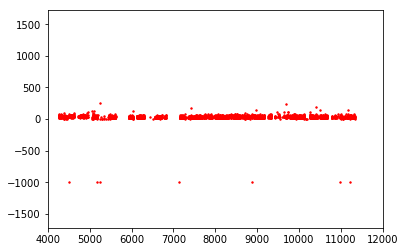

In [29]:
# Phasecam OPD RMS

#plt.scatter(full_table["FRAMENUM"],full_table["PCPHSTD1"], s=2)
plt.scatter(full_table["FRAMENUM"].where(full_table["PCCLOSED"] == True),
            full_table["PCPHSTD1"].where(full_table["PCCLOSED"] == True), s=2, color="r")
plt.xlim([4000,12000])
plt.ylim([-1720,1720])
plt.show()

In [31]:
# median OPD when phase is controlled (in degrees)

print(np.nanmedian(full_table["PCPHSTD1"].where(full_table["PCCLOSED"] == True)))

33.6834485


In [18]:
print(len(full_table["PCPHSTD1"]))

12007


In [28]:
print(full_table["FRAMENUM"].where(full_table["PCCLOSED"] == -99999))

0            0.0
1            1.0
2            2.0
3            3.0
4            4.0
5            5.0
6            6.0
7            7.0
8            8.0
9            9.0
10          10.0
11          11.0
12          12.0
13          13.0
14          14.0
15          15.0
16          16.0
17          17.0
18          18.0
19          19.0
20          20.0
21          21.0
22          22.0
23          23.0
24          24.0
25          25.0
26          26.0
27          27.0
28          28.0
29          29.0
          ...   
11977    11978.0
11978    11979.0
11979    11980.0
11980    11981.0
11981    11982.0
11982    11983.0
11983    11984.0
11984    11985.0
11985    11986.0
11986    11987.0
11987    11988.0
11988    11989.0
11989    11990.0
11990    11991.0
11991    11992.0
11992    11993.0
11993    11994.0
11994    11995.0
11995    11996.0
11996    11997.0
11997    11998.0
11998    11999.0
11999    12000.0
12000    12001.0
12001    12002.0
12002    12003.0
12003    12004.0
12004    12005